**new strategy to plot all EffMem that are sig in AD OR HC, cluster them and then plot the heatmap**

In [1]:
.libPaths("/home/keionn001/.conda/envs/r-new/lib/R/library")
suppressPackageStartupMessages({
library(purrr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(RColorBrewer)
library(slingshot)
library(ComplexHeatmap)
library(circlize)
library(Seurat)
library(clusterProfiler)
library(SeuratWrappers)
library(tradeSeq)
library(patchwork)
library(BiocParallel)
library(ggbeeswarm)
library(org.Hs.eg.db)})

EffM.HC.yhat=readRDS(file="./EffM.HC.yhat.RDS")
EffM.AD.yhat=readRDS(file="./EffM.AD.yhat.RDS")
length(rownames(EffM.HC.yhat))
length(rownames(EffM.AD.yhat)) #should be equal since we prev union them

[1] 175

[1] 175

In [2]:

AD.km.clust = kmeans(t(scale(t(EffM.AD.yhat))), centers = 3)$cluster
AD.km.clust=as.data.frame(AD.km.clust)
AD.km.clust$Genes=rownames(AD.km.clust)
names(AD.km.clust)=c("Cluster","Genes")
head(AD.km.clust)

,Cluster,Genes
,<int>,<chr>
RPL13,1,RPL13
RPS2,1,RPS2
CCL5,2,CCL5
LTB,1,LTB
EEF1A1,1,EEF1A1
RPL41,1,RPL41


In [3]:

AD.km.clust$Cluster <- paste0('Cluster ', AD.km.clust$Cluster)


levels(AD.km.clust$Cluster)
head(AD.km.clust)

[1] "Cluster 1" "Cluster 2" "Cluster 3"

,Cluster,Genes
,<fct>,<chr>
RPL13,Cluster 1,RPL13
RPS2,Cluster 1,RPS2
CCL5,Cluster 2,CCL5
LTB,Cluster 1,LTB
EEF1A1,Cluster 1,EEF1A1
RPL41,Cluster 1,RPL41


In [6]:
all(rownames(AD.mat)==rownames(AD.km.clust))

[1] TRUE

In [12]:
AD.km.clust$Cluster <- factor(AD.km.clust$Cluster,
    levels = c('Cluster 1', 'Cluster 2',"Cluster 3"))

In [16]:
write.csv(AD.km.clust,file="./GSE134577-csf/ADkmeansclust.plot.csv",quote=F)
saveRDS(AD.km.clust,file="./GSE134577-csf/AD.km.clust.RDS")

**plot for HC EffMem**

In [26]:
HC.km.clust = kmeans(t(scale(t(EffM.HC.yhat))), centers = 3)$cluster
HC.km.clust=as.data.frame(HC.km.clust)
HC.km.clust$Genes=rownames(HC.km.clust)
names(HC.km.clust)=c("Cluster","Genes")
head(HC.km.clust)
HC.km.clust$Cluster <- paste0('Cluster ', HC.km.clust$Cluster)
HC.km.clust$Cluster <- factor(HC.km.clust$Cluster,
    levels = c('Cluster 1', 'Cluster 2',"Cluster 3"))
head(HC.km.clust)
levels(HC.km.clust$Cluster)

,Cluster,Genes
,<int>,<chr>
RPL13,1,RPL13
RPS2,1,RPS2
CCL5,2,CCL5
LTB,1,LTB
EEF1A1,1,EEF1A1
RPL41,1,RPL41


,Cluster,Genes
,<fct>,<chr>
RPL13,Cluster 1,RPL13
RPS2,Cluster 1,RPS2
CCL5,Cluster 2,CCL5
LTB,Cluster 1,LTB
EEF1A1,Cluster 1,EEF1A1
RPL41,Cluster 1,RPL41


[1] "Cluster 1" "Cluster 2" "Cluster 3"

In [28]:
HC.mat=t(scale(t(EffM.HC.yhat)))
HC.mat<-HC.mat[rownames(HC.km.clust), ]

In [29]:
all(rownames(HC.mat)==rownames(HC.km.clust))

[1] TRUE

In [192]:
head(HC.km.clust)

,Cluster
,<fct>
CISH,Cluster 1
NME2,Cluster 1
PABPC1,Cluster 1
USP10,Cluster 1
PTGER2,Cluster 1
CRIP2,Cluster 1


In [193]:
HC.mat=t(scale(t(EffM.HC.yhat)))
AD.mat=t(scale(t(EffM.AD.yhat)))

all(rownames(HC.mat)==rownames(HC.km.clust))
all(rownames(AD.mat)==rownames(HC.km.clust))

[1] TRUE

[1] TRUE

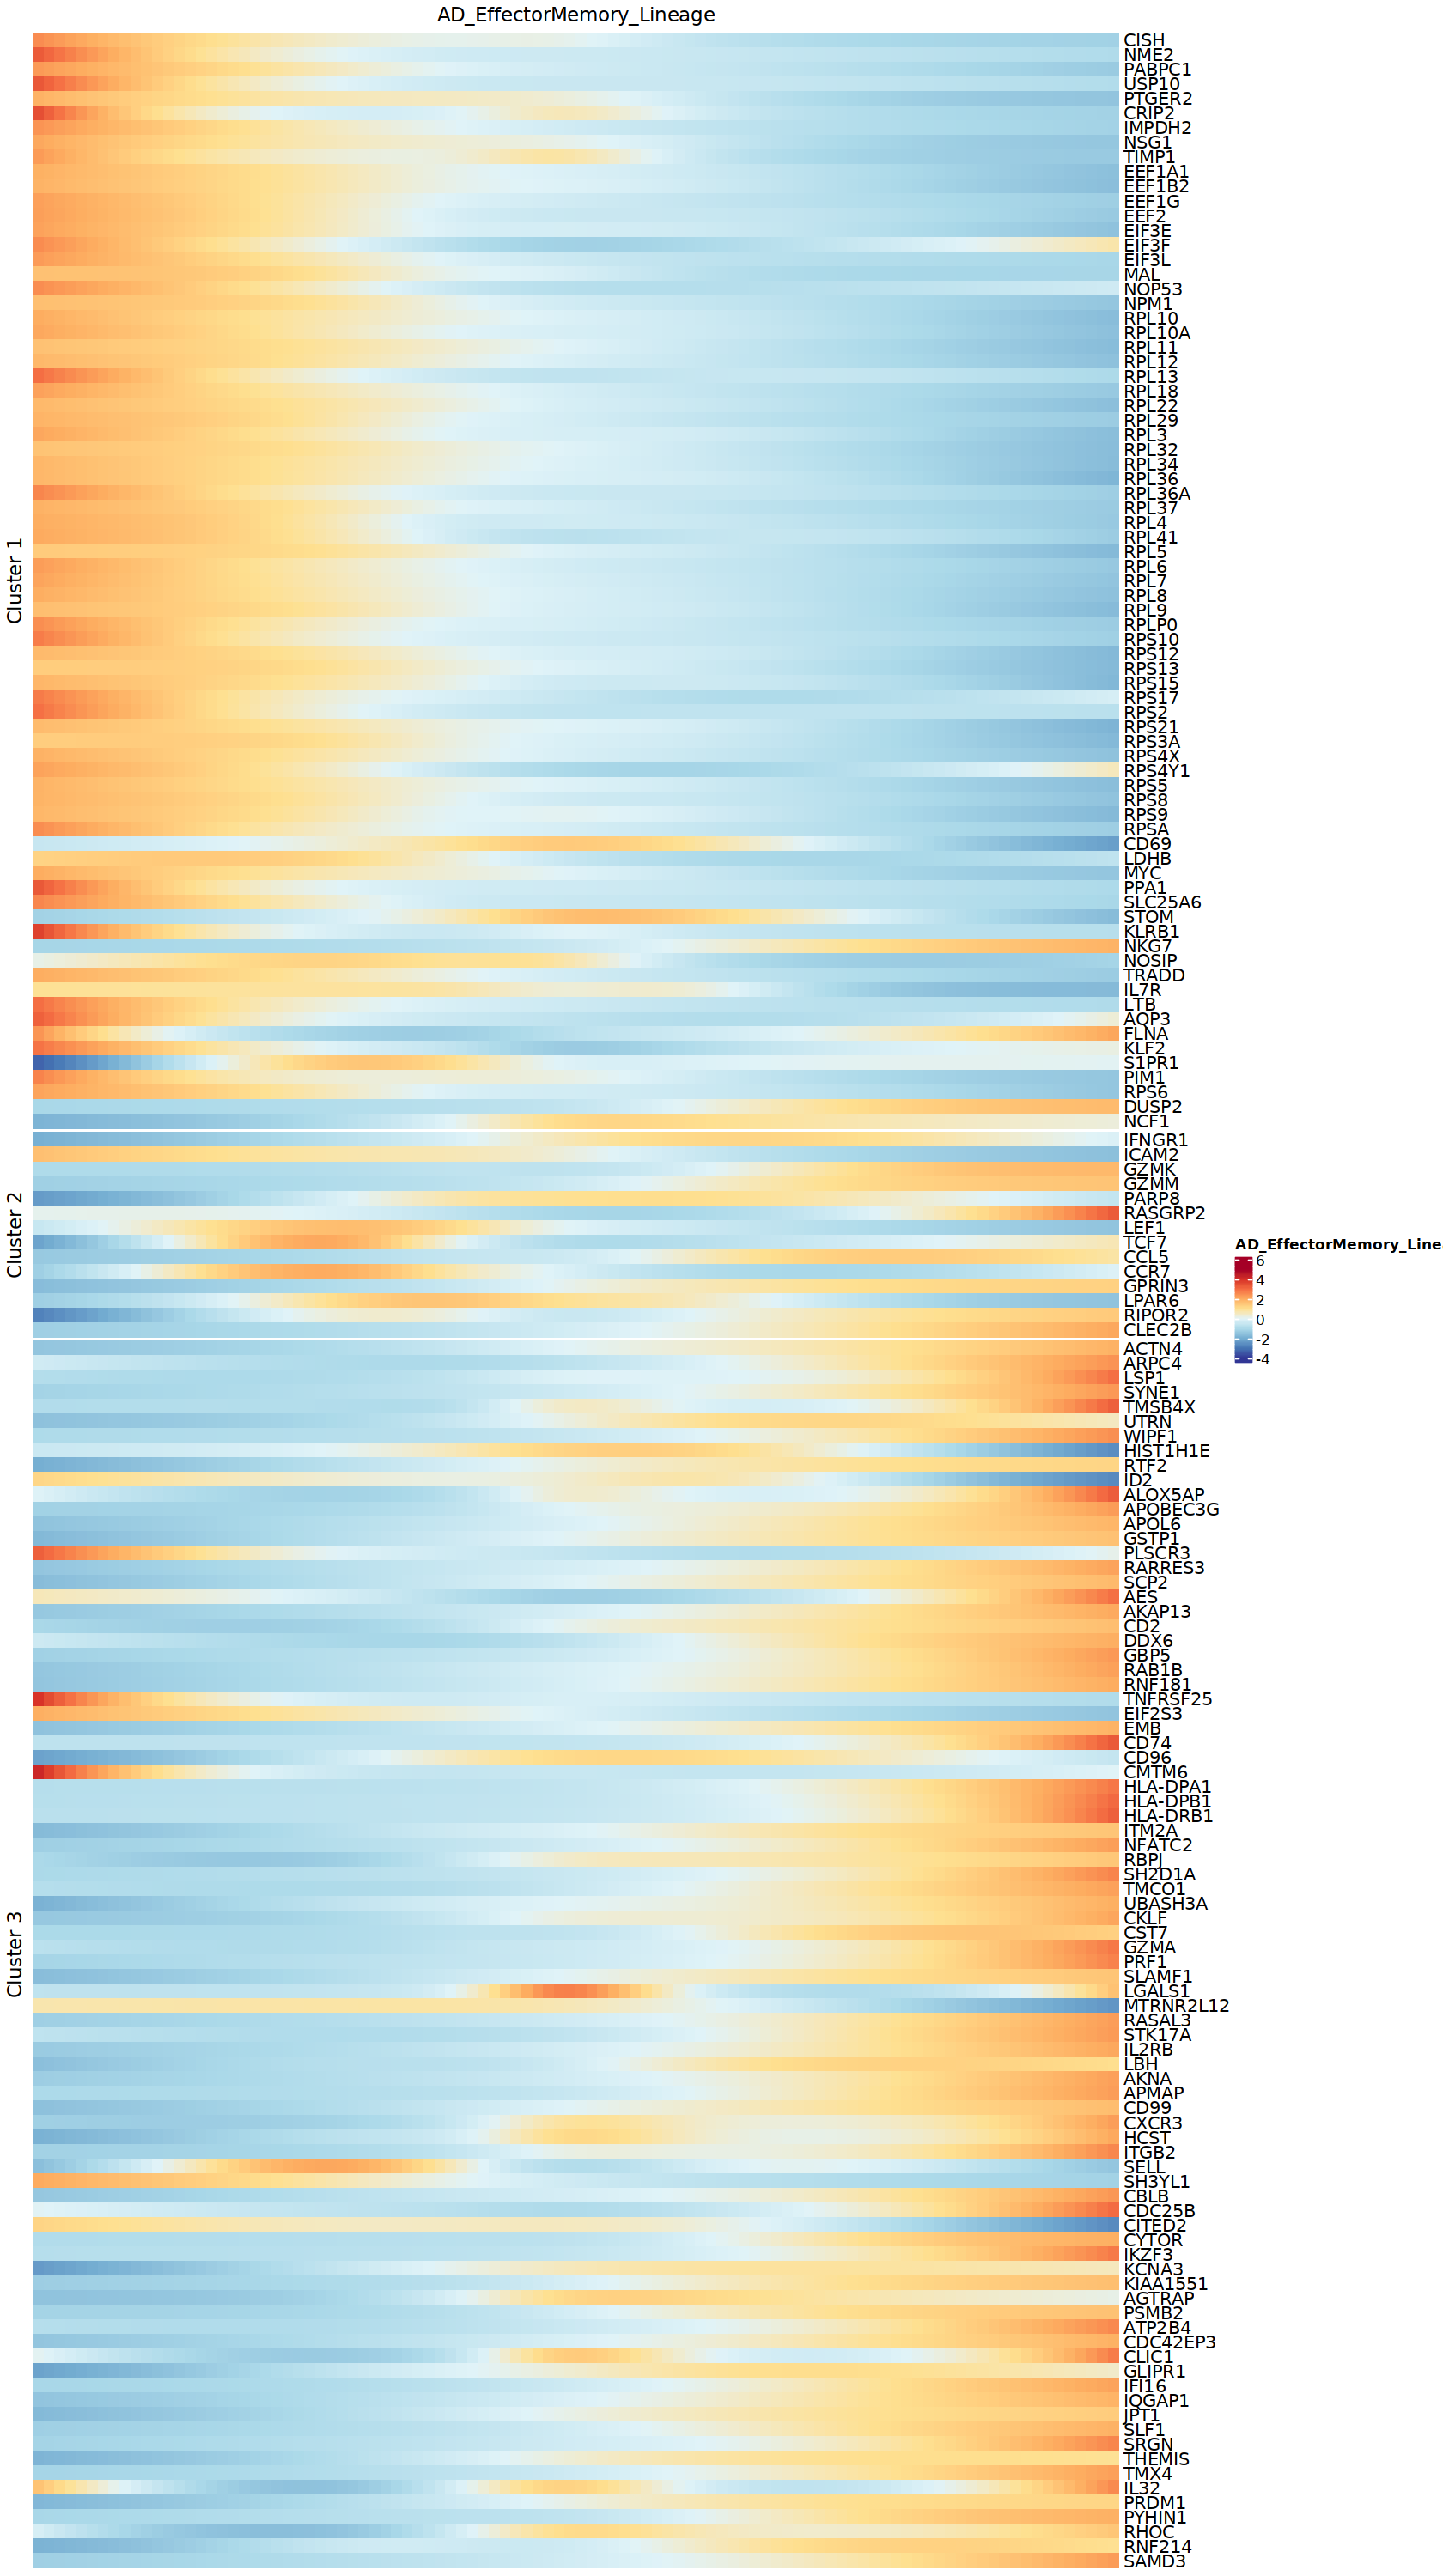

In [194]:
AD.map=Heatmap(AD.mat,
  name                         = "AD_EffectorMemory_Lineage",
  colorRamp2(seq(from=-4,to=5,length=10),rev(brewer.pal(10, "RdYlBu"))),
  show_row_names               = TRUE,
  show_column_names            = FALSE,
  cluster_rows                 = FALSE,
  show_row_dend                = FALSE,
  cluster_row_slices       = F,
  row_split = HC.km.clust$Cluster,
  row_order = rownames(HC.mat),
  cluster_columns              = F,
  column_title = "AD_EffectorMemory_Lineage")

AD.map

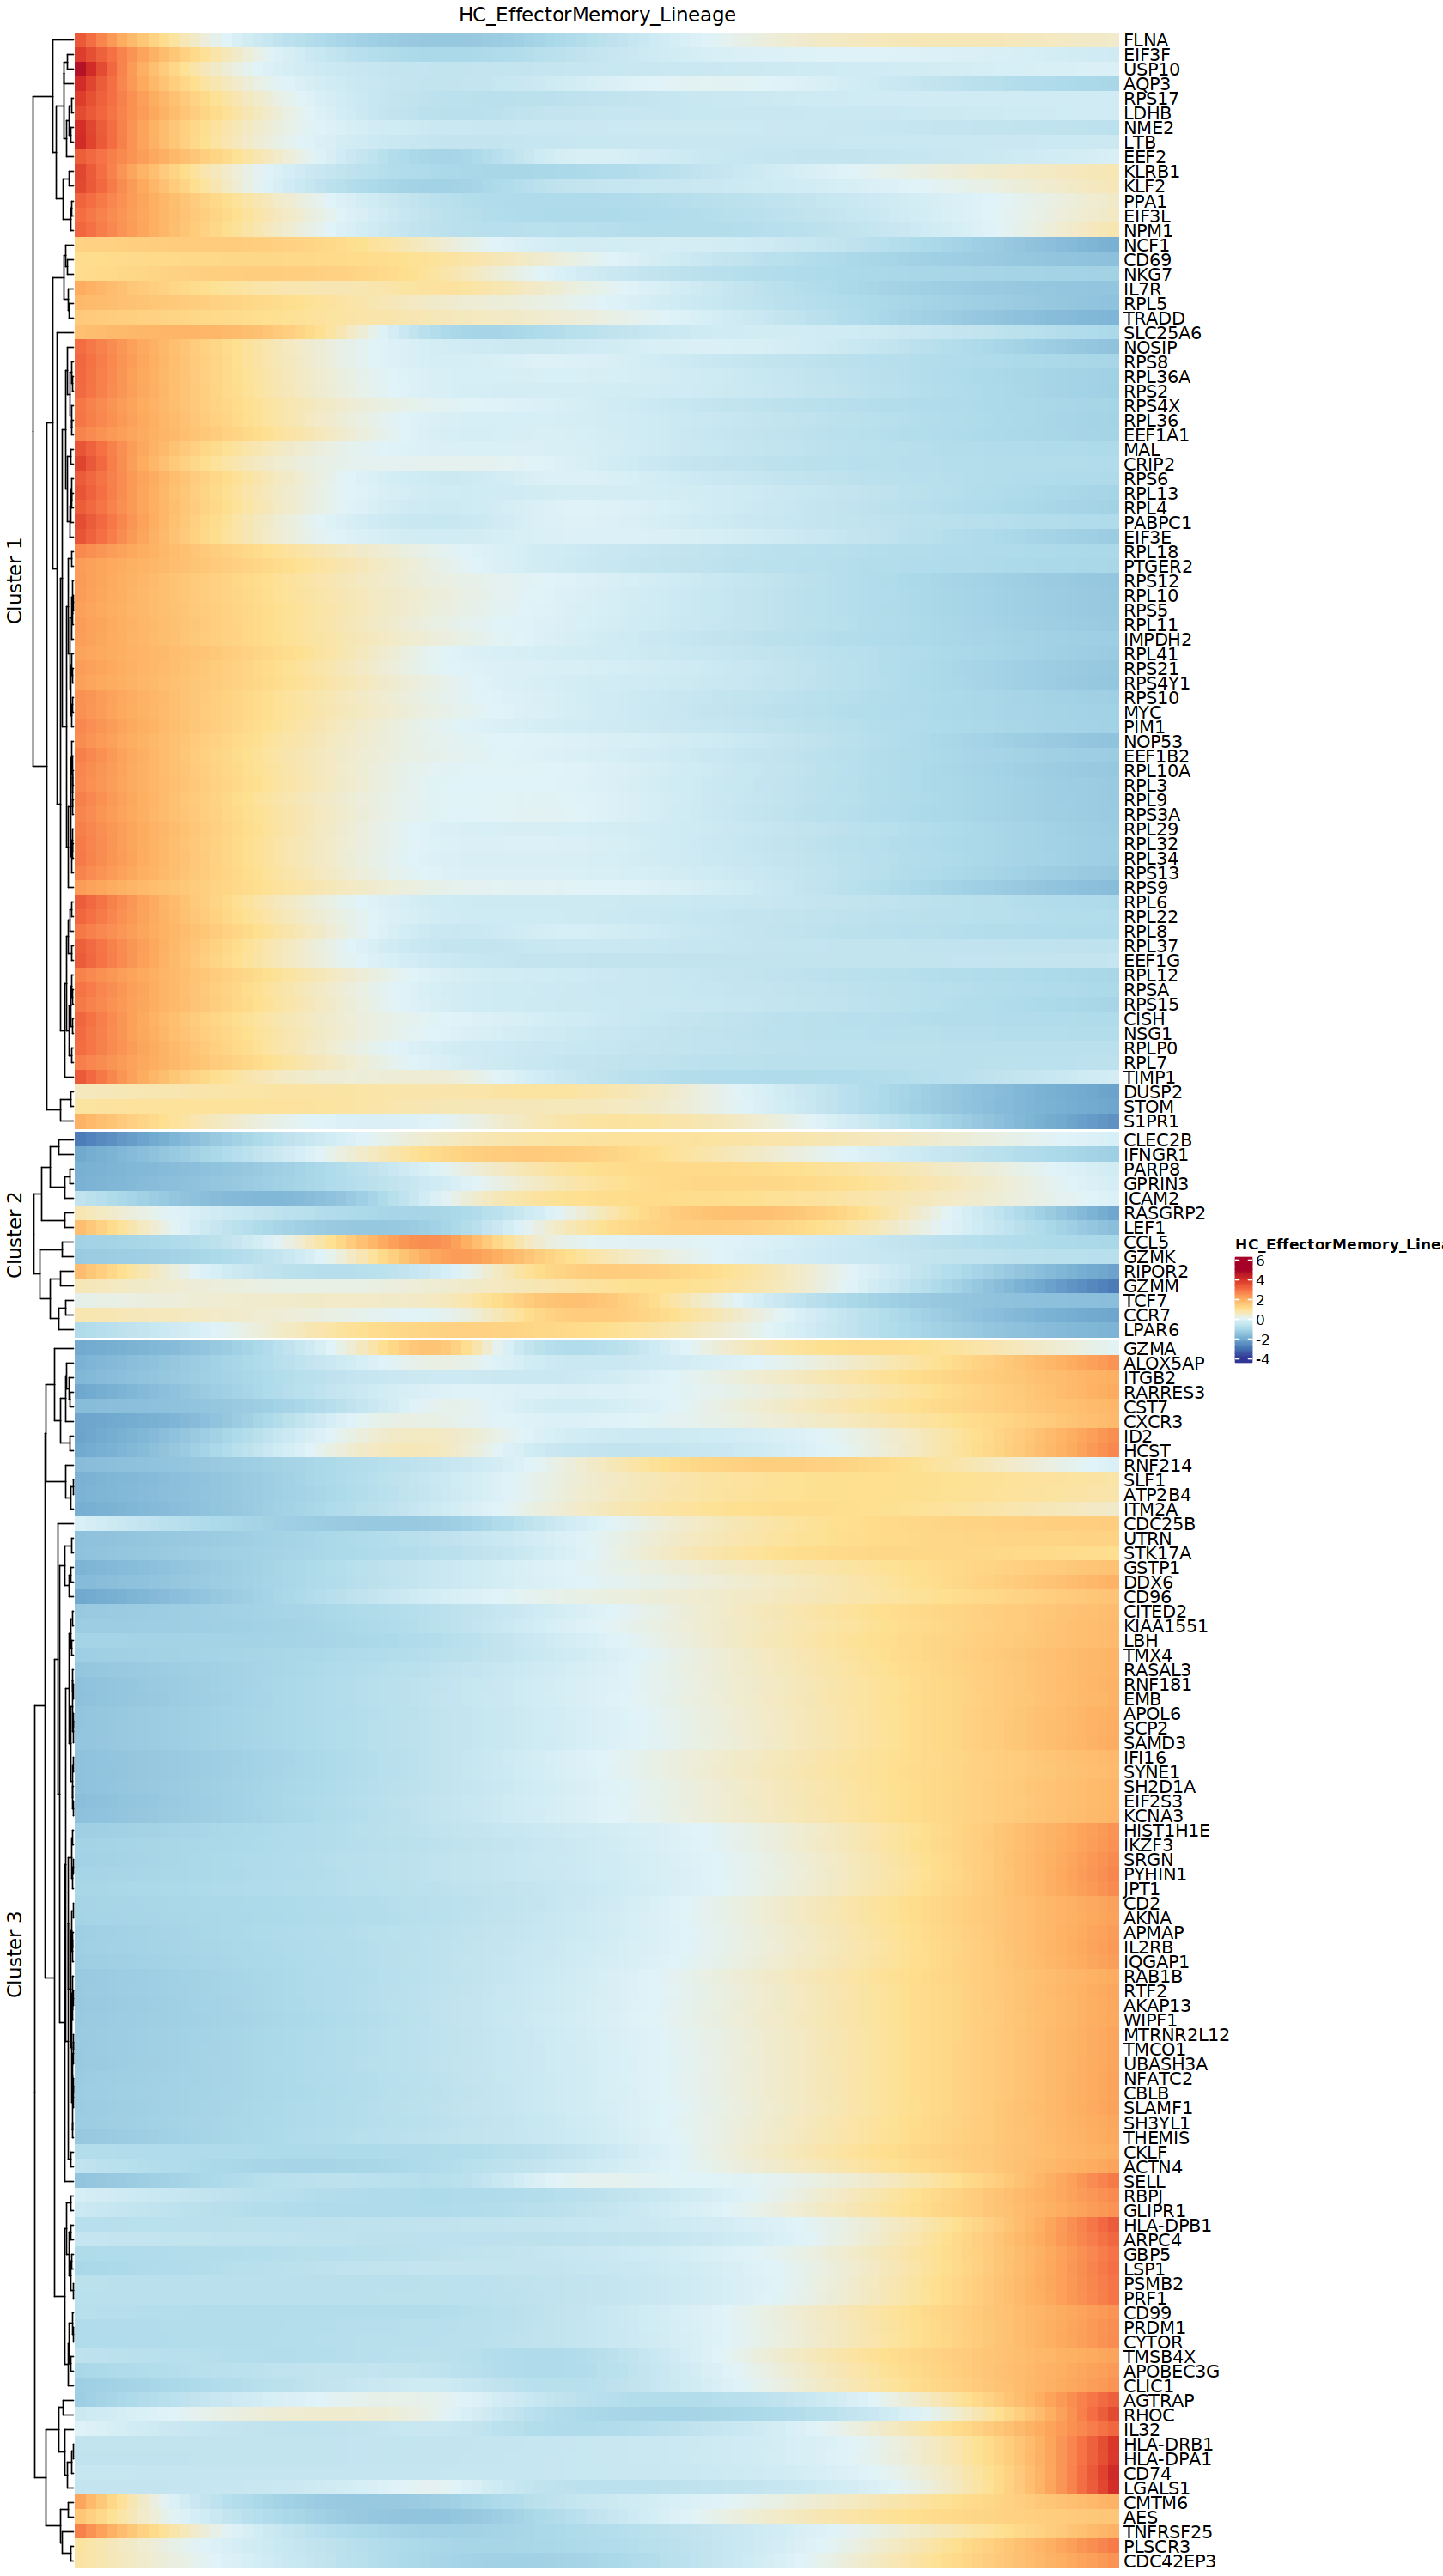

In [201]:
HC.map=Heatmap(HC.mat,
  name                         = "HC_EffectorMemory_Lineage",
  colorRamp2(seq(from=-4,to=5,length=10),rev(brewer.pal(10, "RdYlBu"))),
  show_row_names               = TRUE,
  show_column_names            = FALSE,
  cluster_rows                 = T,
        show_row_dend = T,
      cluster_row_slices       = F,
 row_split = HC.km.clust$Cluster,
    column_dend_height = unit(9, "cm"),
   cluster_columns              = F,
  column_title = "HC_EffectorMemory_Lineage")
HC.map

In [205]:
options(repr.plot.width=14, repr.plot.height=25)
tiff('./GSE134577-csf/ADheatmap_followHCorder.tiff', units="px", width=4000, height=13000, res=400)
AD.map
dev.off()


tiff('./GSE134577-csf/HCheatmap_followHCorder.tiff', units="px", width=4000, height=13000, res=400)
HC.map
dev.off()

png 
  2

png 
  2